# Titanic Passengers Survival Prediction

Import libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

sns.set_style("whitegrid", {"axes.grid" : False})
sns.set_context("notebook", font_scale=1.2)
sns.set_palette("muted")

Load the data

In [2]:
training_set  = pd.read_csv("dataset/train.csv")
testing_set = pd.read_csv("dataset/test.csv")

Shows the first three rows of the training set and the testing set

In [3]:
training_set.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
testing_set.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


Describe the training set

In [5]:
training_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Check if there is any missing values in the training set and the testing set

In [6]:
training_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
testing_set.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Check the correlation of each columns

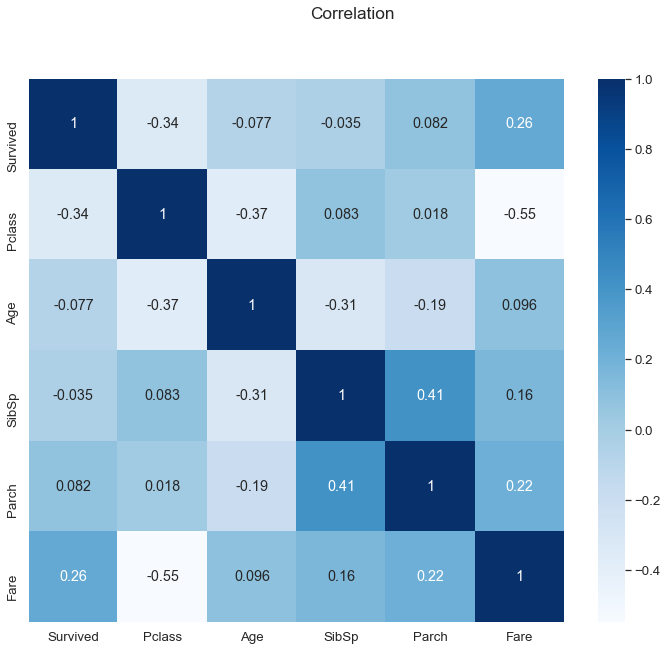

In [8]:
plt.figure(figsize=[12, 10])
plt.suptitle("Correlation")
sns.heatmap(training_set[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(), annot=True, cmap="Blues");

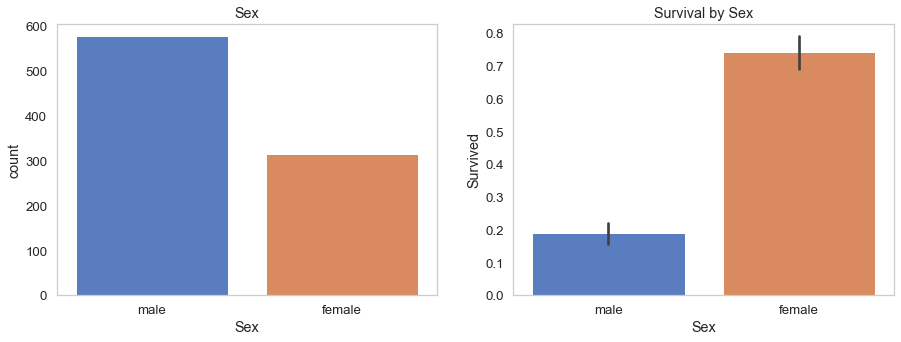

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(ax=axes[0], x="Sex", data=training_set)
axes[0].set_title("Sex")

sns.barplot(ax=axes[1], x="Sex", y="Survived", data=training_set)
axes[1].set_title("Survival by Sex");

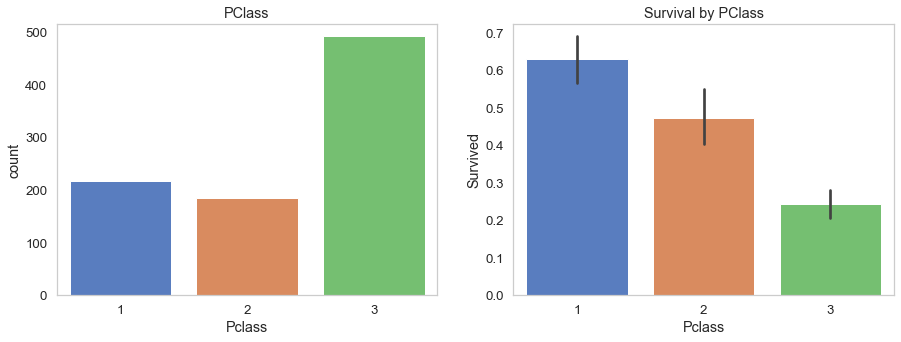

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(ax=axes[0], x="Pclass", data=training_set)
axes[0].set_title("PClass")

sns.barplot(x="Pclass", y="Survived", data=training_set);
axes[1].set_title("Survival by PClass");

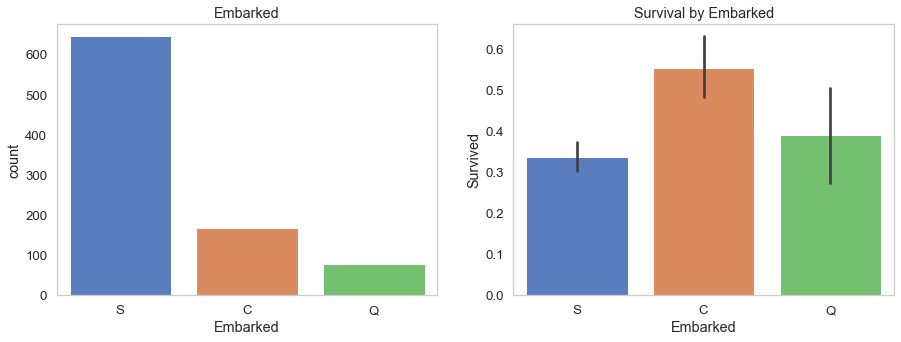

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(ax=axes[0], x="Embarked", data=training_set)
axes[0].set_title("Embarked")

sns.barplot(x="Embarked", y="Survived", data=training_set);
axes[1].set_title("Survival by Embarked");

In [12]:
training_set_copy = training_set.copy()
testing_set_copy = testing_set.copy()

In [13]:
training_set_copy["Embarked"].fillna("S", inplace=True)

In [14]:
imputer = KNNImputer(n_neighbors=3)
training_set_copy["Age"] = imputer.fit_transform(training_set_copy[["Age"]]).ravel()
testing_set_copy["Age"] = imputer.fit_transform(testing_set_copy[["Age"]]).ravel()
testing_set_copy["Fare"] = imputer.fit_transform(testing_set_copy[["Fare"]]).ravel()

In [15]:
drop_column = ["PassengerId", "Name", "Cabin", "Ticket"]
training_set_copy = training_set_copy.drop(drop_column, axis=1)
testing_set_copy = testing_set_copy.drop(drop_column, axis=1)

In [16]:
training_set_copy.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [17]:
testing_set_copy.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [18]:
training_set_copy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [19]:
label_encoder = LabelEncoder()
label = ["Sex", "Embarked"]
training_set_copy[label] = training_set_copy[label].apply(label_encoder.fit_transform)
testing_set_copy[label] = testing_set[label].apply(label_encoder.fit_transform)

In [20]:
X_train = training_set_copy.drop(["Survived"], axis=1)
y_train = pd.DataFrame(training_set_copy["Survived"].copy())
X_test = testing_set_copy

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [22]:
models = [
    ("Logistic Regression", LogisticRegression()),
    ("KNN", KNeighborsClassifier()),
    ("Naive Bayesian", GaussianNB()),
    ("Support Vector Machine", SVC()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier())]

names = []
cv_mean = []
cv_std = []
scoring = "accuracy"
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train.values.ravel(), cv=kfold, scoring=scoring)
    names.append(name)
    cv_mean.append(cv_results.mean())
    cv_std.append(cv_results.std())

model_results = pd.DataFrame(list(zip(names, cv_mean, cv_std)), columns=['model', 'accuracy', 'stdev'])
model_results.round(3)

,model,accuracy,stdev
0,Logistic Regression,0.792,0.029
1,KNN,0.798,0.032
2,Naive Bayesian,0.789,0.023
3,Support Vector Machine,0.826,0.044
4,Decision Tree,0.776,0.038
5,Random Forest,0.807,0.039


## Fine Tuning

In [23]:
clf = SVC()

rand_list = {"C": stats.uniform(2, 10),
             "gamma": stats.uniform(0.1, 1)}
              
rand_search = RandomizedSearchCV(clf, param_distributions = rand_list, n_iter = 20, n_jobs = 4, cv = 10, random_state = 42, scoring = "accuracy") 
rand_search.fit(X_train, y_train.values.ravel()) 
rand_search.best_params_

{'C': 5.046137691733707, 'gamma': 0.19767211400638388}

In [24]:
y_train_predicted = rand_search.predict(X_train)

Classification report

In [25]:
clf_report = classification_report(y_train, y_train_predicted)
print(clf_report)

              precision    recall  f1-score   support

           0       0.84      0.96      0.89       549
           1       0.91      0.70      0.79       342

    accuracy                           0.86       891
   macro avg       0.88      0.83      0.84       891
weighted avg       0.87      0.86      0.86       891



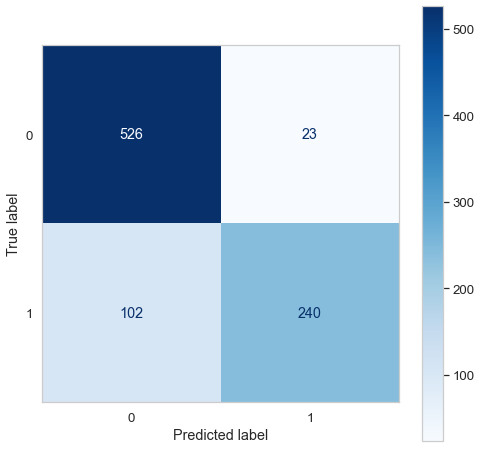

In [26]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(rand_search, X_train, y_train, cmap="Blues", ax=ax)
plt.show()

Predict the test set

In [27]:
y_test_predicted = rand_search.predict(X_test)
y_test_predicted = pd.DataFrame(y_test_predicted, columns=["Survived"])
y_test_predicted.head(10)

,Survived
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,0
8,1
9,0


## Conclusion